#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

2021-11-10 14:26:17.767156: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-10 14:26:17.767200: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

2021-11-10 14:26:39.073129: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-10 14:26:39.073207: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-10 14:26:39.073246: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (11402.pyspark3): /proc/driver/nvidia/version does not exist
2021-11-10 14:26:39.073560: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history =model.fit(x=x_img_train_normalize,
                         y=y_label_train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)


'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

2021-11-10 14:31:35.250205: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 491520000 exceeds 10% of free system memory.
2021-11-10 14:31:37.516205: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1250/1250 [==============================] - 56s 45ms/step - loss: 1.9189 - accuracy: 0.3076 - val_loss: 1.7674 - val_accuracy: 0.3959
Epoch 2/10
1250/1250 [==============================] - 51s 41ms/step - loss: 1.5866 - accuracy: 0.4280 - val_loss: 1.5317 - val_accuracy: 0.4998
Epoch 3/10
1250/1250 [==============================] - 51s 40ms/step - loss: 1.4431 - accuracy: 0.4819 - val_loss: 1.4396 - val_accuracy: 0.5241
Epoch 4/10
1250/1250 [==============================] - 51s 41ms/step - loss: 1.3466 - accuracy: 0.5171 - val_loss: 1.3493 - val_accuracy: 0.5543
Epoch 5/10
1250/1250 [==============================] - 53s 42ms/step - loss: 1.2734 - accuracy: 0.5455 - val_loss: 1.3128 - val_accuracy: 0.5748
Epoch 6/10
1250/1250 [==============================] - 71s 57ms/step - loss: 1.2181 - accuracy: 0.5689 - val_loss: 1.2536 - val_accuracy: 0.5975
Epoch 7/10
1250/1250 [==============================] - 62s 50ms/step - loss: 1.1591 - accuracy: 0.5895 - val_loss: 1.2042 -

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

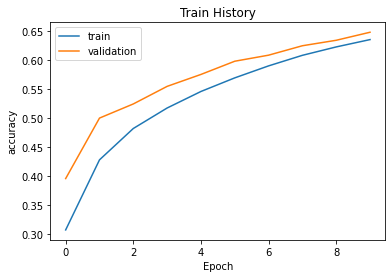

In [24]:
show_train_history(train_history,'accuracy','val_accuracy')

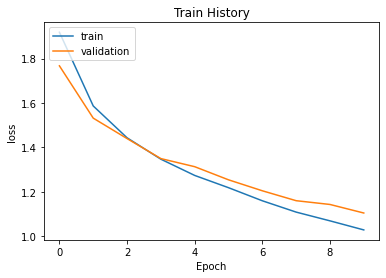

In [25]:
show_train_history(train_history,'loss','val_loss')

In [27]:
print("Evaluate on test data")
results = model.evaluate(x_img_test_normalize, y_label_test_OneHot, batch_size=32)
print("test loss, test acc:", results)


Evaluate on test data
313/313 [==============================] - 5s 14ms/step - loss: 1.0978 - accuracy: 0.6401
test loss, test acc: [1.097825050354004, 0.6401000022888184]


## loss='mean_squared_error'

In [28]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

train_history_mse =model.fit(x=x_img_train_normalize,
                         y=y_label_train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)



2021-11-10 15:24:06.752467: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/10
1250/1250 [==============================] - 109s 87ms/step - loss: 0.0455 - accuracy: 0.6632 - val_loss: 0.0496 - val_accuracy: 0.6588
Epoch 2/10
1250/1250 [==============================] - 90s 72ms/step - loss: 0.0452 - accuracy: 0.6671 - val_loss: 0.0492 - val_accuracy: 0.6626
Epoch 3/10
1250/1250 [==============================] - 98s 78ms/step - loss: 0.0448 - accuracy: 0.6687 - val_loss: 0.0492 - val_accuracy: 0.6617
Epoch 4/10
1250/1250 [==============================] - 69s 55ms/step - loss: 0.0446 - accuracy: 0.6722 - val_loss: 0.0488 - val_accuracy: 0.6646
Epoch 5/10
1250/1250 [==============================] - 61s 48ms/step - loss: 0.0446 - accuracy: 0.6711 - val_loss: 0.0488 - val_accuracy: 0.6647
Epoch 6/10
1250/1250 [==============================] - 58s 46ms/step - loss: 0.0444 - accuracy: 0.6741 - val_loss: 0.0487 - val_accuracy: 0.6626
Epoch 7/10
1250/1250 [==============================] - 56s 45ms/step - loss: 0.0440 - accuracy: 0.6767 - val_loss: 0.0485 

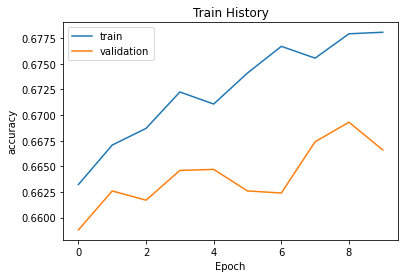

In [29]:
show_train_history(train_history_mse,'accuracy','val_accuracy')

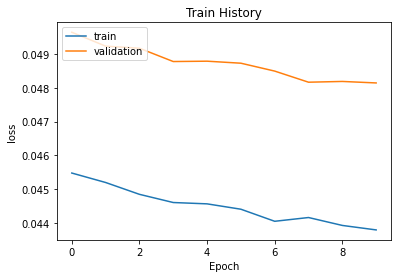

In [30]:
show_train_history(train_history_mse,'loss','val_loss')

In [31]:
print("Evaluate on test data - mse")
results_mse = model.evaluate(x_img_test_normalize, y_label_test_OneHot, batch_size=32)
print("test loss, test acc:", results_mse)

Evaluate on test data - mse
313/313 [==============================] - 2s 8ms/step - loss: 0.0481 - accuracy: 0.6697
test loss, test acc: [0.04807557910680771, 0.669700026512146]


## loss='binary_crossentropy'

In [32]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history_binary =model.fit(x=x_img_train_normalize,
                         y=y_label_train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

2021-11-10 15:43:24.589482: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/10
1250/1250 [==============================] - 58s 46ms/step - loss: 0.2026 - accuracy: 0.6452 - val_loss: 0.2066 - val_accuracy: 0.6550
Epoch 2/10
1250/1250 [==============================] - 58s 47ms/step - loss: 0.1783 - accuracy: 0.6585 - val_loss: 0.2026 - val_accuracy: 0.6635
Epoch 3/10
1250/1250 [==============================] - 60s 48ms/step - loss: 0.1750 - accuracy: 0.6609 - val_loss: 0.1983 - val_accuracy: 0.6660
Epoch 4/10
1250/1250 [==============================] - 57s 46ms/step - loss: 0.1721 - accuracy: 0.6675 - val_loss: 0.1971 - val_accuracy: 0.6658
Epoch 5/10
1250/1250 [==============================] - 57s 46ms/step - loss: 0.1701 - accuracy: 0.6699 - val_loss: 0.1958 - val_accuracy: 0.6698
Epoch 6/10
1250/1250 [==============================] - 57s 46ms/step - loss: 0.1681 - accuracy: 0.6737 - val_loss: 0.1936 - val_accuracy: 0.6729
Epoch 7/10
1250/1250 [==============================] - 58s 46ms/step - loss: 0.1669 - accuracy: 0.6747 - val_loss: 0.1920 -

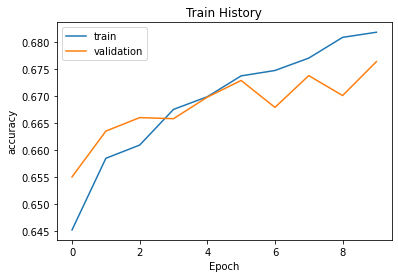

In [33]:
show_train_history(train_history_binary,'accuracy','val_accuracy')

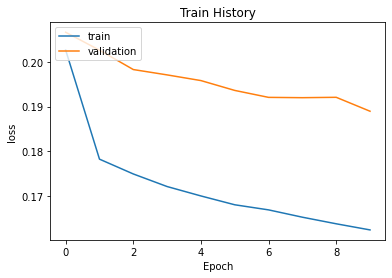

In [34]:
show_train_history(train_history_binary,'loss','val_loss')

In [35]:
print("Evaluate on test data")
results_binary = model.evaluate(x_img_test_normalize, y_label_test_OneHot, batch_size=32)
print("test loss, test acc:", results_binary)

Evaluate on test data
313/313 [==============================] - 3s 9ms/step - loss: 0.1887 - accuracy: 0.6757
test loss, test acc: [0.18873463571071625, 0.6757000088691711]
